Para el estudio del consumo de los dos carburantes, el siguiente notebook está dividido en:
- 1.  Analisis exploratorio
- 2. Visualizacion
- 3. Modelos predictivos
- 4. Conclusion

# 1. Analisis exploratorio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import regex as re
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
%matplotlib inline

import numpy as np
from numpy import nan

In [2]:
meas = pd.read_csv('measurements.csv')
print(meas.shape)

meas.tail()

(388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [3]:
meas2 = pd.read_excel('measurements2.xlsx')
print(meas2.shape)

meas2.tail()

(388, 12)


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16.0,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25.0,31,AC,SP98,1,0,0,NaN,NaN
385,16.0,3.8,45,25.0,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25.0,31,AC,SP98,1,0,0,NaN,NaN
387,14.7,5.0,25,25.0,30,AC,SP98,1,0,0,NaN,NaN


Los dos archivos son iguales, por lo que he elegido coger el Excel, ya que los types están 
mejor definidos en floats y enteros

Considero:

ditance =  km 

speed = km/h 

consume = liters / 100 km

In [4]:
meas2.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

De 388 datos, en las columnas refill liters, gas y specials, 
hay más del 80% de NaNs, por lo que decido no utilizar estas columnas para nada de los pasos siguientes

In [5]:
meas2.drop(axis=0, index=None, columns = ["refill liters","refill gas", 'specials' ], inplace=True)

Para saber si la relacion entre temp_inside es necesaria para el consumo, voy a ver si se correlaciona

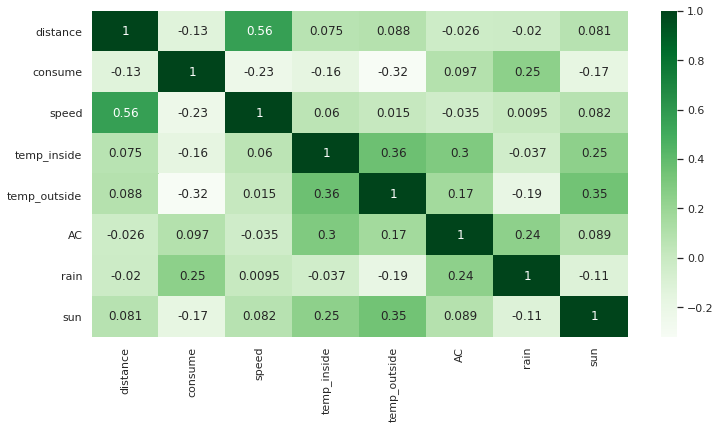

In [6]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
sns.heatmap(meas2.corr(), cmap='Greens',annot=True);

In [7]:
meas2.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [8]:
meas2.temp_inside.unique()

array([21.5, 22.5, 20. ,  nan, 21. , 20.5, 23. , 23.5, 25. , 24. , 22. ,
       19. , 24.5, 25.5])

Ya que la relación no es tan grande, decido rellenar los datos que me faltan de la temperatura interior, 
con la media, en los que tienen la misma temp_outside

In [9]:
meas2.fillna(21.7, inplace=True)

# 2. Visualizaciones 

### Empiezo a ver los datos en visualizacion

/home/lapalmi87/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


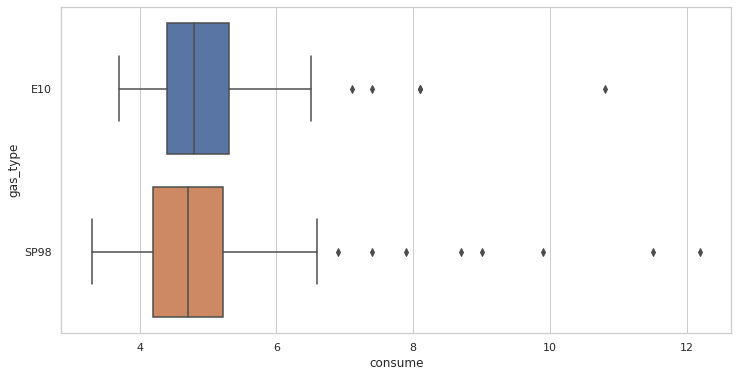

In [10]:
sns.boxplot(meas2.consume,meas2.gas_type);

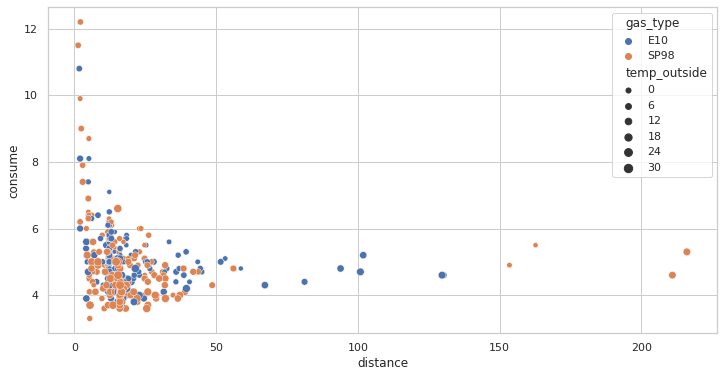

In [11]:
sns.scatterplot(x="distance", y="consume", hue='gas_type', size = 'temp_outside', data=meas2);

Tanto en el scatterplot como en el box plot se puede ver que hay outliers, 
coches que consumen mucho y recorren cortas distancias, 
considero que los conductores y coches que consumen más de 6,5 litros, no recorriendo casi distancia son debido a
momentos especificos y en condiciones anormales,
como son litros / 100km, supongo que los datos de alto consumo son en parado

In [12]:
# Quito outliers por encima
Q1 = meas2.consume.quantile(0.25)
Q3 = meas2.consume.quantile(0.75)
IQR = Q3 - Q1

df = meas2[~(((meas2['consume']  > (Q3*1.22))))]

In [13]:
meas2.shape , df.shape

((388, 9), (372, 9))

/home/lapalmi87/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


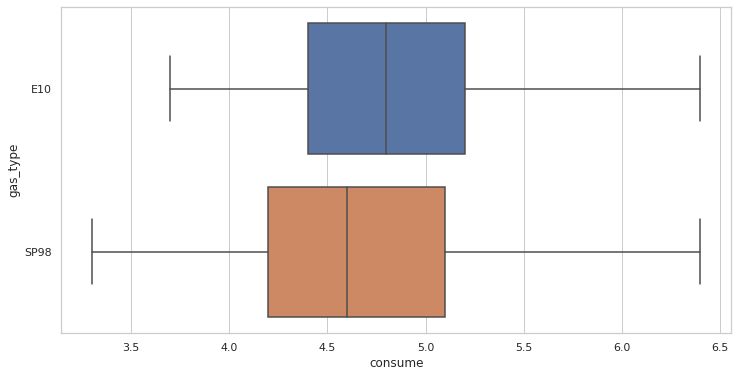

In [14]:
sns.boxplot(df.consume,df.gas_type);

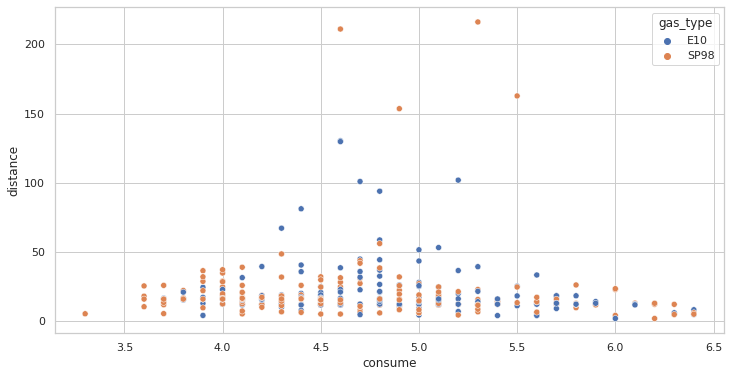

In [15]:
sns.scatterplot(x="consume", y="distance", hue='gas_type', data=df);

In [16]:
df['gas'] = df['gas_type'].map({'SP98': 1, 'E10': 0}) 

<ipython-input-16-e35432f46239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gas'] = df['gas_type'].map({'SP98': 1, 'E10': 0})


/home/lapalmi87/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/lapalmi87/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


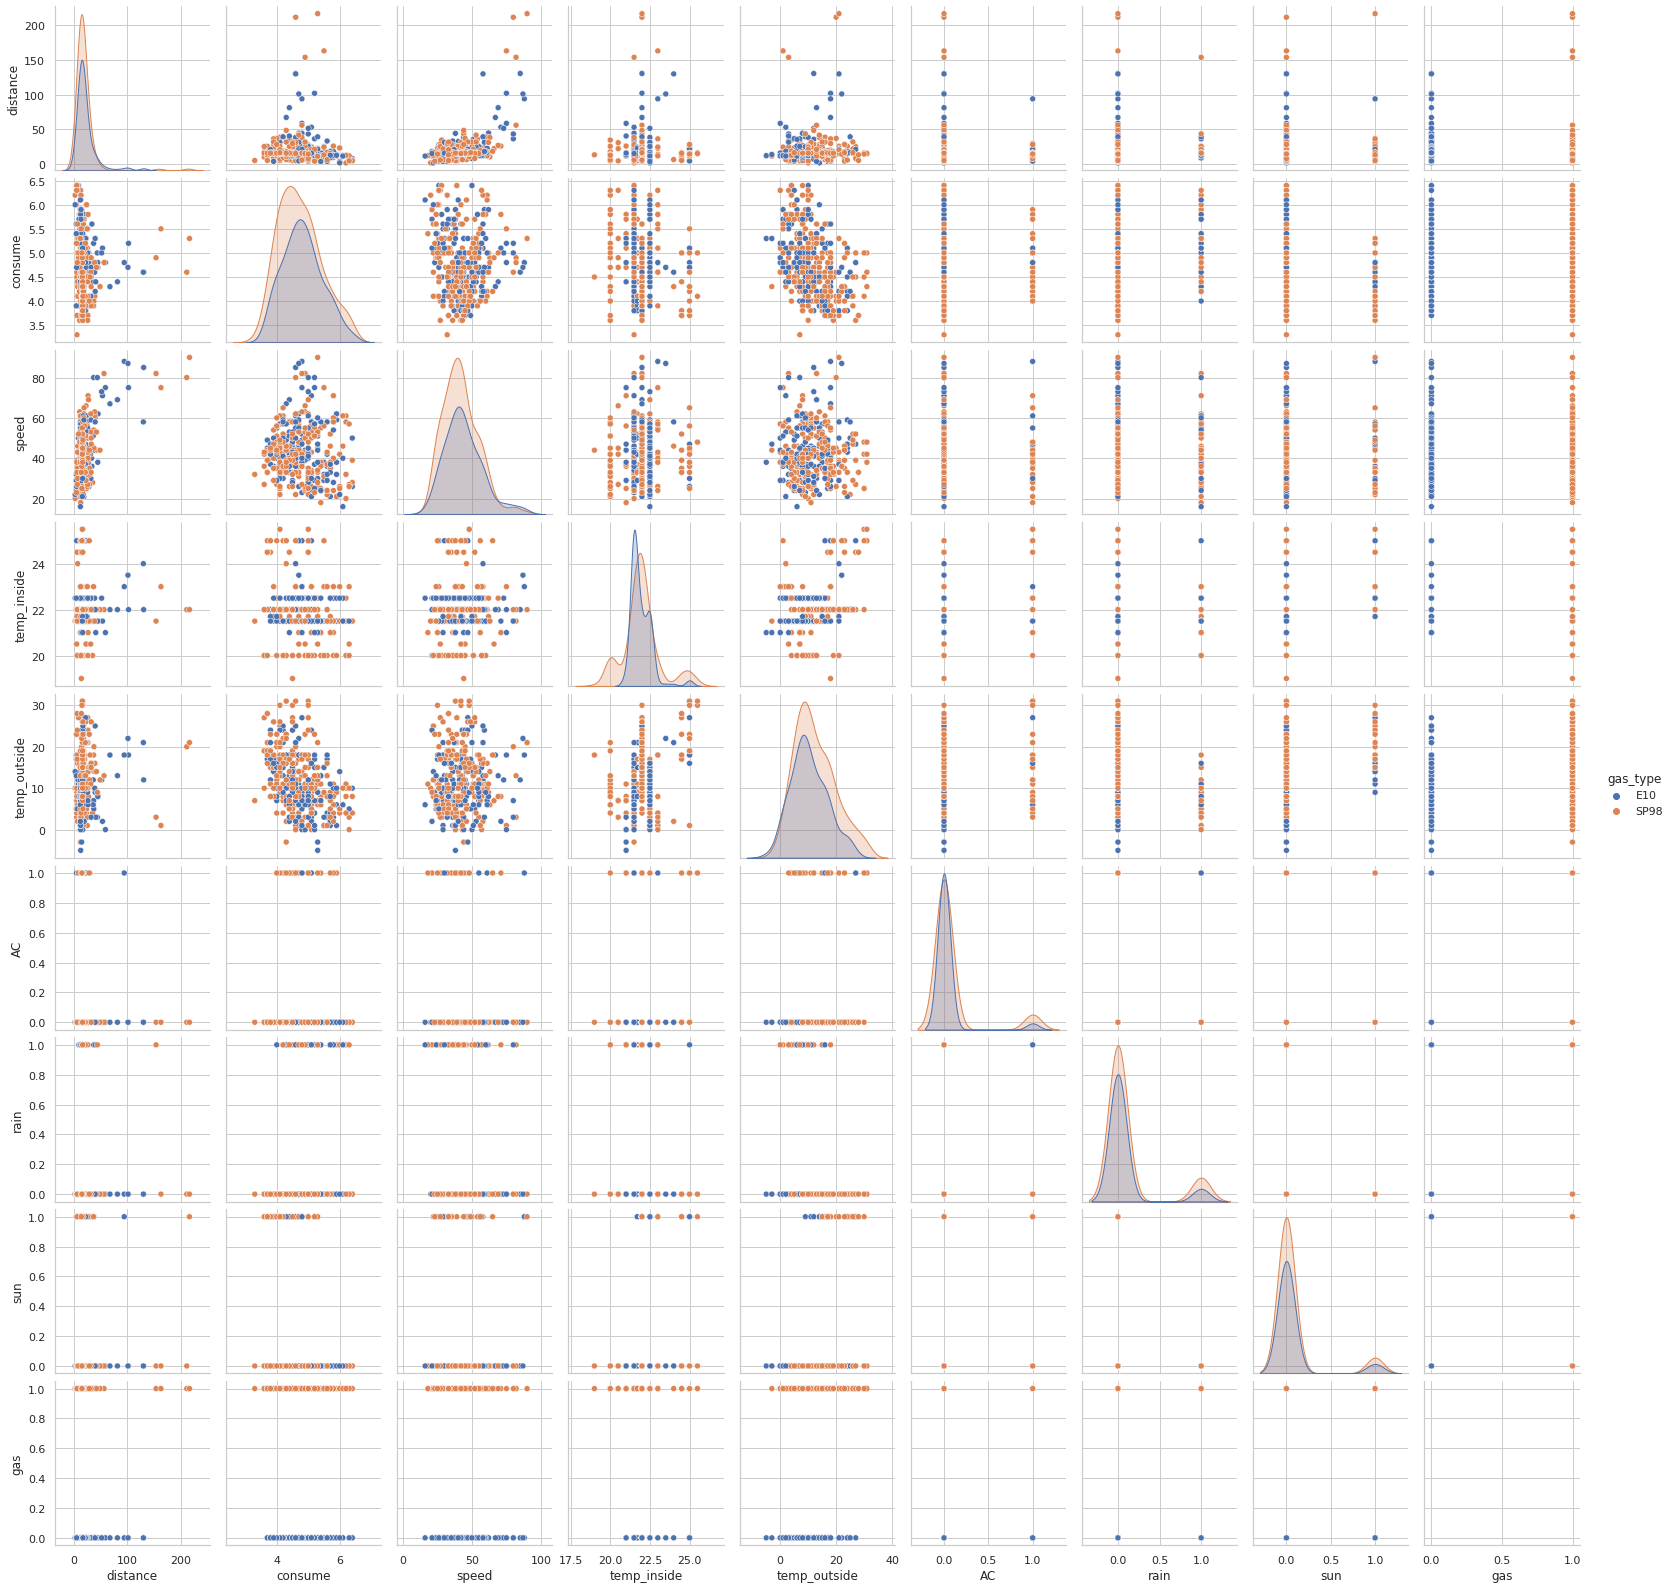

In [17]:
sns.pairplot(df, hue="gas_type");

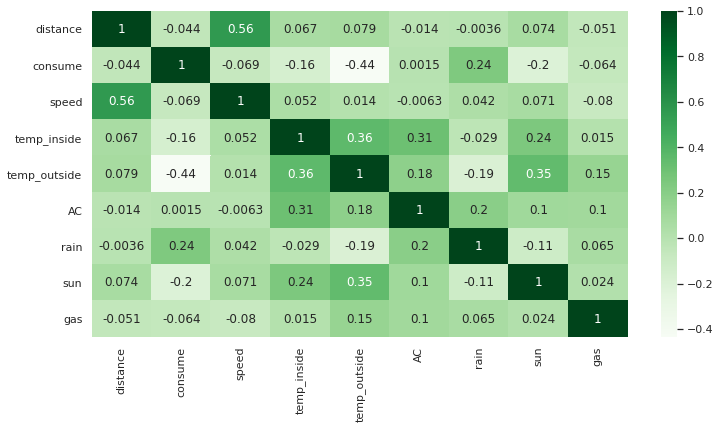

In [18]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
sns.heatmap(df.corr(), cmap='Greens',annot=True);

La matriz de correlacion nos dice que el consumo no tiene una alta relacion con el tipo de gas, pero si 
con la temperatura de fuera son los más correlacionados con el consumo

A cuanta menos temperatura fuera, mayor el consumo de gasolina

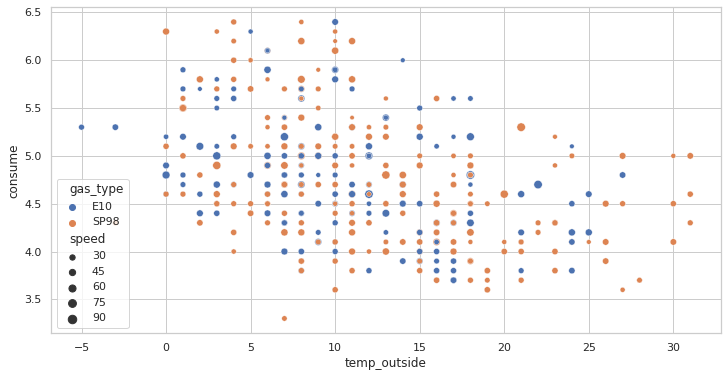

In [19]:
sns.scatterplot(x="temp_outside", y="consume", hue='gas_type', size='speed',data=df);

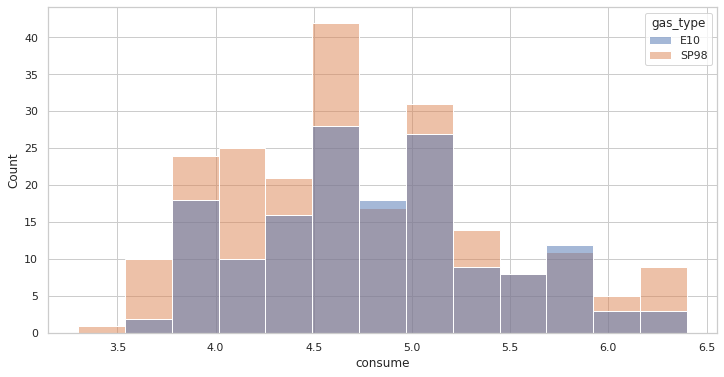

In [20]:
sns.histplot(data=df, x="consume", hue="gas_type", multiple="layer");

In [21]:
E10 = meas2[meas2.gas_type == 'E10']
SP98 = meas2[meas2.gas_type == 'SP98']

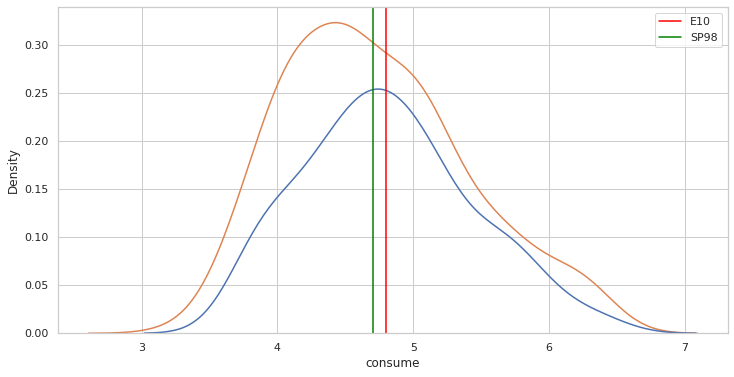

In [22]:
graf = sns.kdeplot(x=df.consume, hue=df.gas_type)
graf.axvline(x=E10.consume.median(), c="red", label="E10")
graf.axvline(x=SP98.consume.median(), c="green", label="SP98")
plt.legend();

# 3.  Modelos predictivos

Compruebo los siguientes modelos para ver cual me presenta mejor resultado:

### Lineal regresion

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import train_test_split  as tts

In [50]:
y_data = df['consume']
x_data = df.drop('consume', axis=1)
X_data = x_data.drop(columns = ['gas_type'], axis=1)
X_train, X_test, y_train, y_test = tts(X_data, y_data, test_size=0.2)


In [51]:
Linreg = LinearRegression()
Linreg.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred=Linreg.predict(X_test)

y_pred[:10]

array([5.40813446, 4.60872526, 4.82880776, 5.21878122, 4.12139414,
       5.08641766, 4.57726426, 4.53468473, 4.61501608, 5.05431929])

In [53]:
train_score=Linreg.score(X_train, y_train)  # R2
test_score=Linreg.score(X_test, y_test)

print('Train:', train_score)
print('Test:', test_score)  

Train: 0.2202484548048701
Test: 0.23504515797760572


/home/lapalmi87/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


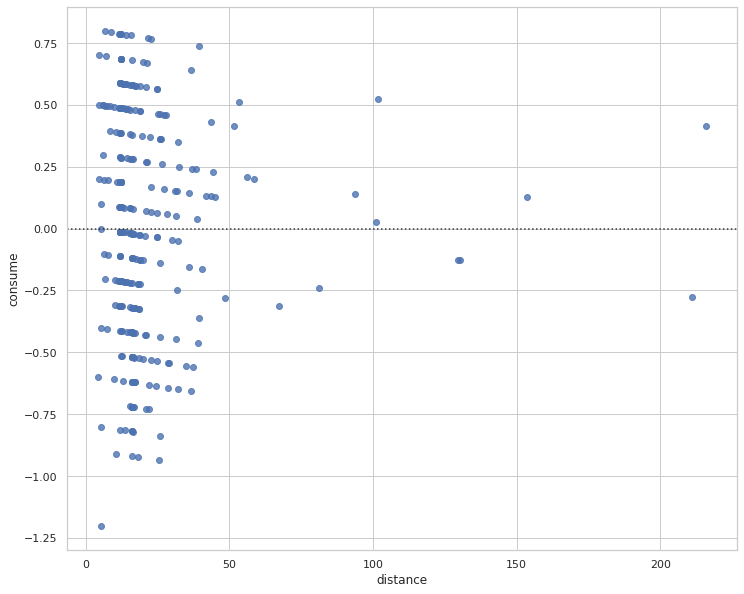

In [82]:
# I check the residual plot, in case there is a linear regression in the consume. 
plt.figure(figsize=(12, 10))
sns.residplot(df['distance'], df['consume'])
plt.show()

### RANDOM Forest

In [138]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [139]:
rfr=RFR()

In [140]:
y_data = df['consume']
x_data = df.drop('consume', axis=1)
X_data = x_data.drop(columns = ['gas_type','temp_inside'], axis=1)
X_train, X_test, y_train, y_test = tts(X_data, y_data, test_size=0.2)


In [141]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [125]:
y_pred=rfr.predict(X_test)

y_pred[:10]

array([4.281     , 4.827     , 4.989     , 4.636     , 4.366     ,
       4.053     , 4.535     , 4.965     , 3.93566667, 4.381     ])

In [128]:
train_score=rfr.score(X_train, y_train)  
test_score=rfr.score(X_test, y_test)

print('Train rfr:', train_score)
print('Test rfr:', test_score) 

Train rfr: 0.8982735651656631
Test rfr: 0.3331828799417651


### H2o

In [115]:
import h2o
from h2o.automl import H2OAutoML

In [99]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.20.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.20.04, mixed mode, sharing)
  Starting server from /home/lapalmi87/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcz9at_g3
  JVM stdout: /tmp/tmpcz9at_g3/h2o_lapalmi87_started_from_python.out
  JVM stderr: /tmp/tmpcz9at_g3/h2o_lapalmi87_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Europe/Madrid
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_lapalmi87_c2b7lo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.975 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [102]:
train=h2o.H2OFrame(df)


X=train.columns
y='consume'
X.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [142]:
aml=H2OAutoML(max_models=10, seed=2)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_3_AutoML_2_20220317_123811

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.05948220496188859
RMSE: 0.24388973935343938
MAE: 0.1961035777352769
RMSLE: 0.0449560958586697
R^2: 0.7152058868479293
Mean Residual Deviance: 0.05948220496188859
Null degrees of freedom: 303
Residual degrees of freedom: 301
Null deviance: 63.493553670335736
Residual deviance: 18.082590308414133
AIC: 12.8028896086388

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13524209625024414
RMSE: 0.36775276511570126
MAE: 0.2981466199989432
RMSLE: 0.06713492295444366
R^2: 0.35247604074045225
Mean Residual Deviance: 0.13524209625024414
Null degrees of freedom: 303
Residual degrees of freedom: 301
Null deviance: 63.70917

In [143]:
lb=aml.leaderboard
lb.head(rows=lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_3_AutoML_2_20220317_123811,0.135242,0.367753,0.135242,0.298147,0.0671349
StackedEnsemble_AllModels_2_AutoML_2_20220317_123811,0.136322,0.369218,0.136322,0.299488,0.0674092
StackedEnsemble_BestOfFamily_6_AutoML_2_20220317_123811,0.137365,0.370628,0.137365,0.305491,0.0677891
StackedEnsemble_AllModels_5_AutoML_2_20220317_123811,0.140224,0.374465,0.140224,0.308774,0.0684876
GBM_3_AutoML_2_20220317_123811,0.140705,0.375106,0.140705,0.30137,0.0684078
XGBoost_3_AutoML_2_20220317_123811,0.140974,0.375465,0.140974,0.301389,0.0684121
StackedEnsemble_AllModels_1_AutoML_2_20220317_123811,0.143882,0.379318,0.143882,0.308959,0.069319
GBM_4_AutoML_2_20220317_123811,0.143968,0.379432,0.143968,0.302722,0.0691606
StackedEnsemble_BestOfFamily_2_AutoML_2_20220317_123811,0.145268,0.38114,0.145268,0.310043,0.0696738
GBM_2_AutoML_2_20220317_123811,0.145392,0.381304,0.145392,0.305708,0.069412


# 4. CONCLUSION:

El consumo de cada carburante depende mayormente de la temperatura exterior del coche y del uso en que se esté empleando, al igual que los dias de lluvia.
En general nos encontramos que es dificil predecir el consumo, debido a la diferencia entre distancias y velocidades. Por lo que se recomendaria un siguiente paso de evaluacion de cada uno de ellos y con una relacion en cuanto al precio. 